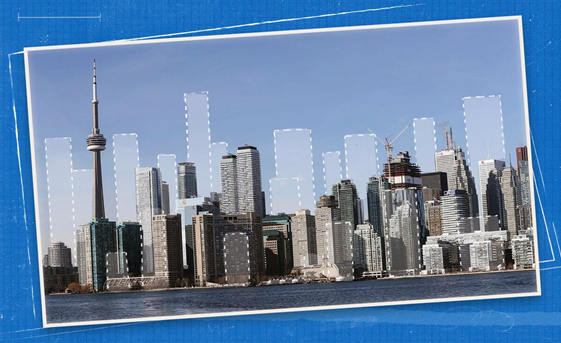

# **“Exploring Toronto Neighborhoods to Identify a Suitable Location for a New Indian Restaurant”** 
## Capstone Project for IBM's Data Science Professional Certificate by Amy Reidy, November 2020

---

## 1. Introduction

### 1.1 Background
This project is the final assignment of the Capstone Project Course for IBM’s Data Science Professional Certificate. Throughout the previous 8 courses, myself and other aspiring data scientists have learned the fundamentals of Data Science, including data science methodology, data analysis and visualisation with Python, and machine learning models, such as K-means. This project is therefore an opportunity to apply all our new knowledge to a hands-on project. 

In the previous assignment in this course, we learned how to use the Foursquare API to explore Toronto neighbourhoods and to cluster them into different groups based on the most common venues. Building on this exercise, I have decided to continue to explore Toronto – a city that I lived in for two years – to investigate where would be a suitable location for a new Indian restaurant, based on the density of existing Indian restaurants and the number of Indian residents in each neighborhood.

### 1.2 Problem Statement

**“Exploring Toronto Neighborhoods to Identify a Suitable Location for a New Indian Restaurant”** 

### 1.3 Problem Description
Toronto is the most populous city in Canada, and in 2016, [51% of the Toronto residents belonged to a visible minority group](https://en.wikipedia.org/wiki/Demographics_of_Toronto) (including 32% South Asian residents), making it one of the most multicultural and multiracial cities in the world. Unsurprisingly, it also boasts a remarkably diverse food scene and has many different ethnic neighborhoods where you can sample cuisines from around the world, including Little Portugal, Little Italy, Koreatown, Little India, and multiple Chinatowns. 

I have decided to investigate and predict where would be the best neighborhood to open a new Indian restaurant not only because it was my favourite takeout food to indulge in when I lived in Toronto, but also, as I believe this could be a very promising business venture as the number of Indian residents in Canada is rapidly growing, and in 2016, [almost 51% of the entire Indian Canadian community](https://en.wikipedia.org/wiki/Indo-Canadians) resided in the Greater Toronto Area (GTA).

There has been a reported [105% increase from 2016 to 2019](https://www.forbes.com/sites/stuartanderson/2020/02/03/indians-immigrating-to-canada-at-an-astonishing-rate/?sh=20c7602a2b5f) in the number of Indians being admitted to Canada as permanent residents , with also a 127% increase of international students from India from 2016 to 2018. This rise could be partly due to large numbers of young Indian tech workers moving to Canada, as it is becoming increasingly difficult to obtain permanent residence in the United States. Furthermore, Indians accounted for [a quarter of new permanent residents](https://www.cicnews.com/2020/02/a-quarter-of-canadas-immigrants-arrived-from-india-in-2019-0213700.html#gs.lw5fov ) permitted to Canada in 2019 , and there is now an estimated [1 million Indians living in Canada](https://moving2canada.com/best-cities-for-indian-immigrants/#:~:text=Fast%2Dforward%20more%20than%20100,million%20Indian%20citizens%20in%20Canada). So now more than ever would be a fantastic time to open a new Indian restaurant and profit from this recent surge in the Indian population. 

To investigate which neighborhoods could be the optimal location for a new Indian restaurant, I will first explore the population distributions in top visible minority groups in neighborhoods and the relationship between venues in the neighborhoods. Then I will identify the relationship between neighborhoods and existing Indian restaurants, and the relationship between East Indian population and Indian restaurants. And finally, I will use clustering analysis to identify suitable location for opening a new Indian restaurant. 

### 1.4 Interest
This project is targeted at the following stakeholders:
- Entrepreneurs who are interested in opening a new Indian restaurant in Toronto.
- Indian restaurant owners who may be interested in relocating or expanding to another location.
- Food truck owners who serve Indian cuisine and are looking for prime locations to target. 

Other stakeholders who may be interested in the results of this project:
- Indian individuals and families who are interested in moving to Toronto and would like to know which areas have the highest population of Indian residents and/or greatest density of Indian restaurants. 

## 2. Data 

### 2.1 Data Sources

- I extracted spatial information, such as latitude and longitude of Toronto neighborhoods from “https://cocl.us/Geospatial_data”
- I used data from the Wikipedia page “List of Postal code of Canada: M” (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) to get information about the neighborhoods in Toronto, for example their name, postal code and borough.
- I extracted information about various venues in Toronto and their spatial information using Foursquare’s API. More details about the API can be found on https://developer.foursquare.com/docs. I was interested in learning about existing Indian restaurants. Therefore, I extracted the number of venues listed as Indian restaurants in each neighborhood so I could explore the relationship between neighborhoods and Indian restaurants.
- Although I mentioned that there has been an 125% increase between 2016 to 2019 in the number of Indians being admitted to Canada as permanent residents, unfortunately the most recent dataset I could find for the ethnic makeup of Toronto populations is from 2016. I extracted this population information from the Wikipedia page https://en.wikipedia.org/wiki/Demographics_of_Toronto. I used this demographic data to get population information about East Indian ethnic group in Toronto neighbourhoods. This information together with the Foursquare data about existing Indian restaurants allowed me to explore the relationship between the Indian population and existing restaurants.

### 2.2 Summary of Pre-processing and Data Cleaning

The pre-processing and data cleaning involved scraping Toronto neighborhood data, extracting latitude and longitude of neighborhoods, scraping venue items, extracting Indian population in neighborhoods and number of existing Indian restaurants. All the extracted data was converted into dataframes for further analysis. Each pre-processing and data cleaning steps are discussed and documented as markdowns together with code in this Jupyter notebook.

## 3. Methodology 

First, we need to install all the necessary packages

In [1]:
!pip install lxml
import requests # library to handle requests
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
    
!pip install folium
import folium # plotting library
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


###  Extract Toronto Neighborhood Data

- Extract table of postal codes in Toronto from Wikipedia page and convert into a dataframe 


In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

dfs = pd.read_html(url)

print(len(dfs))

3


In [3]:
df = dfs[0]
df.shape

(180, 3)

### Clean data in the dataframe
- Rename ppstalcode and neighborhood columns labels
- Drop rows that have Borough = Not assigned 
- Combine neighborhoods with same postalcode 
- Add borough value to the neighborhood where the value = Not assigned

In [4]:
df.rename(columns= {'Postal Code': 'PostalCode', 'Neighbourhood': 'Neighborhood'}, inplace = True)
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [5]:
filter_df = df[df['Borough'] != "Not assigned"]
# Combining the neighbourhoods with same Postalcode
df2 = filter_df.groupby(['PostalCode','Borough'], sort=False).agg(', '.join)
df2.reset_index(inplace=True)

# add the not assigned neighbour from Borough
df2['Neighborhood'] = np.where(df2['Neighborhood'] == 'Not assigned', df2['Borough'], df2['Neighborhood'])
df2.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [6]:
# show the dataframe shape (no of rows and columns)
df2.shape

(103, 3)

In [7]:
# group by based on  Borough and postalCode
df3 = df2.groupby(['Borough', 'PostalCode'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()
df3.head()

,Borough,PostalCode,Neighborhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


In [8]:
df3.shape

(103, 3)

### Import Geospatial information (latitude and longitude) of neighborhoods
- Import geospatial data from https://cocl.us/Geospatial_data
- Change the postal code column name 
- Merge latitude and longitudes of the locations to dataframe

In [9]:
lat_log_df = pd.read_csv('https://cocl.us/Geospatial_data')
lat_log_df.rename(columns= {'Postal Code': 'PostalCode'}, inplace = True )
lat_log_df.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
toronto_df = pd.merge (df3, lat_log_df, on = "PostalCode")
toronto_df

,Borough,PostalCode,Neighborhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160
...,...,...,...,...,...
98,York,M6C,Humewood-Cedarvale,43.693781,-79.428191
99,York,M6E,Caledonia-Fairbanks,43.689026,-79.453512
100,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013
101,York,M6N,"Runnymede, The Junction North",43.673185,-79.487262


Print the total number of boroughs and neighborhoods

In [11]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(toronto_df['Borough'].unique()),
        toronto_df.shape[0]
    )
)

The dataframe has 10 boroughs and 103 neighborhoods.


### Visualization of Toronto Neighborhoods
- Install geopy library to extract lat and long from the given address of the location 
- Nominatim converts the given address into lat and long values
- Use folium to visualize neighborhoods on Toronto map

In [12]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Solving environment: ...working... done

# All requested packages already installed.



In [13]:
#Use geopy library to get the latitude and longitude values of Toronto city.
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [14]:
# visualize Toronto map with neighorhoods
toronto_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_df['Latitude'], toronto_df['Longitude'], toronto_df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(toronto_map)  
    
toronto_map


### Extract demographics data about the Toronto neighborhoods from Wikipedia
- Extract demographics data of Toronto neighborhoods from the Demographics of Toronto Wikipedia page.


In [15]:
url = 'https://en.wikipedia.org/wiki/Demographics_of_Toronto'

dfs1 = pd.read_html(url)

print(len(dfs1))

38


In [16]:
# TORONTO & EAST YORK population distribution by ethnicity 
toronto_eastyork_population_df = dfs1[12]
toronto_eastyork_population_df = toronto_eastyork_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %',
                                                     '%.8':'Ethnic Origin 9 in %'})
toronto_eastyork_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,Ethnic Origin 9 in %
0,Spadina-Fort York,114315,English,16.4,Chinese,16.0,Irish,14.6,Canadian,14.0,Scottish,13.2,French,7.70,German,7.6,NaN,NaN,NaN,NaN
1,Beaches-East York,108435,English,24.2,Irish,19.9,Canadian,19.7,Scottish,18.9,French,8.7,German,8.40,NaN,NaN,NaN,NaN,NaN,NaN
2,Davenport,107395,Portuguese,22.7,English,13.6,Canadian,12.8,Irish,11.5,Italian,11.1,Scottish,11.00,NaN,NaN,NaN,NaN,NaN,NaN
3,Parkdale-High Park,106445,English,22.3,Irish,20.0,Scottish,18.7,Canadian,16.1,German,9.8,French,8.88,Polish,8.5,NaN,NaN,NaN,NaN
4,Toronto-Danforth,105395,English,22.9,Irish,19.5,Scottish,18.7,Canadian,18.4,Chinese,13.8,French,8.86,German,8.8,Greek,7.3,NaN,NaN
5,Toronto-St. Paul's,104940,English,18.5,Canadian,16.1,Irish,15.2,Scottish,14.8,Polish,10.3,German,7.90,Russian,7.7,Italian,7.3,French,7.2
6,University-Rosedale,100520,English,20.6,Irish,16.6,Scottish,16.3,Canadian,15.2,Chinese,14.7,German,8.70,French,7.7,Italian,7.4,NaN,NaN
7,Toronto Centre,99590,English,15.7,Canadian,13.7,Irish,13.4,Scottish,12.6,Chinese,12.5,French,7.20,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# NORTH YORK population distribution by ethnicity 
northyork_population_df = dfs1[13]
northyork_population_df = northyork_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
northyork_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Don Valley West,101790,English,19.2,Canadian,15.1,Scottish,14.9,Irish,14.2,Chinese,11.2,NaN,NaN,NaN,NaN,NaN,NaN
6,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN


In [18]:

# SCARBOROUGH population distribution by ethnicity 
Scarborough_population_df = dfs1[14]
Scarborough_population_df = Scarborough_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
Scarborough_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN
1,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN
2,Scarborough-Agincourt,104225,Chinese,47.0,East Indian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Scarborough-Rouge Park,101445,East Indian,16.7,Canadian,11.8,Sri Lankan,11.1,English,9.8,Filipino,9.3,Jamaican,8.4,Scottish,7.2,Irish,7.0
4,Scarborough-Guildwood,101115,East Indian,18.0,Canadian,11.6,English,9.7,Filipino,8.5,Sri Lankan,7.8,Chinese,7.1,Scottish,7.0,NaN,NaN
5,Scarborough North,97610,Chinese,46.6,East Indian,11.8,Sri Lankan,9.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#ETOBICOKE & YORK population distribution by ethnicity 
etobicoke_york_population_df = dfs1[15]
etobicoke_york_population_df = etobicoke_york_population_df.rename(columns={'%':'Ethnic Origin 1 in %', 
                                                      '%.1':'Ethnic Origin 2 in %',
                                                     '%.2':'Ethnic Origin 3 in %',
                                                     '%.3':'Ethnic Origin 4 in %',
                                                     '%.4':'Ethnic Origin 5 in %',
                                                     '%.5':'Ethnic Origin 6 in %',
                                                     '%.6':'Ethnic Origin 7 in %',
                                                     '%.7':'Ethnic Origin 8 in %'})
etobicoke_york_population_df

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %
0,Etobicoke-Lakeshore,127520,English,17.1,Canadian,15.9,Irish,14.4,Scottish,13.5,Polish,9.2,Italian,9.1,Ukrainian,7.6,German,7.1
1,Etobicoke North,116960,East Indian,22.2,Canadian,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Etobicoke Centre,116055,Italian,15.1,English,14.3,Canadian,12.1,Irish,10.8,Scottish,10.4,Ukrainian,8.1,Polish,7.4,NaN,NaN
3,York South-Weston,115130,Portuguese,14.5,Italian,12.8,Canadian,8.7,Jamaican,8.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Extract Location Data and Venues using Foursquare API in Toronto Neighborhoods
- Foursquare API is used to retrieve information about venues present in the neighborhoods of Toronto. 
- The API requires credentials such as client_id, client_secret, version and limit. 
- We are interested in Indian restaurants for each neighborhood, so I will also use the categoryID to specify that I would like to only retrieve information about Indian restaurants. 
- I'm going to investigate which distance would be the best to use for the radius limit. If it is too small, it will not capture that many restaurants in the neighborhood, but if the radius is too large there will be a lot of restaurants overlapping between neighborhoods. 

In [20]:
import json
from pandas.io.json import json_normalize

In [21]:
CLIENT_ID = 'PTMRT0VCS4TT3AXXAOIUZX2511BEG13F54ND30MZVARIZIUA' # your Foursquare ID
CLIENT_SECRET = 'ES1LG3DTN5W1I1KGGYVKJIAI3ODZIDEUMAJU1GQNVUWQZJVB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
CATEGORYID = '4bf58dd8d48988d10f941735' # Category Id number for 'Indian Restaurant'.
radius=500
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: PTMRT0VCS4TT3AXXAOIUZX2511BEG13F54ND30MZVARIZIUA
CLIENT_SECRET:ES1LG3DTN5W1I1KGGYVKJIAI3ODZIDEUMAJU1GQNVUWQZJVB


In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500): #start with radius set at 500m
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng,
            VERSION, 
            CATEGORYID,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
LIMIT = 100
toronto_venues = getNearbyVenues(names=toronto_df['Neighborhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Davisville,43.704324,-79.388790,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant
1,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,Roti Cuisine of India,43.674618,-79.408249,Indian Restaurant
2,"St. James Town, Cabbagetown",43.667967,-79.367675,Butter Chicken Factory,43.667072,-79.369184,Indian Restaurant
3,"St. James Town, Cabbagetown",43.667967,-79.367675,Rainbow Restaurant,43.667416,-79.369350,Indian Restaurant
4,"St. James Town, Cabbagetown",43.667967,-79.367675,Ambal Trading,43.667538,-79.369350,Market
...,...,...,...,...,...,...,...
103,"Steeles West, L'Amoreaux West",43.799525,-79.318389,New Friends Restaurant Inc,43.799255,-79.313270,Indian Restaurant
104,"Steeles West, L'Amoreaux West",43.799525,-79.318389,Chauhan’s Indian Express Take Out & Catering,43.795303,-79.319779,Indian Restaurant
105,"Little Portugal, Trinity",43.647927,-79.419750,Indian Grill,43.646555,-79.419874,Indian Restaurant
106,"High Park, The Junction South",43.661608,-79.464763,Amaya,43.665283,-79.465131,Indian Restaurant


In [24]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue'].unique())))

There are 74 uniques categories.


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000): #change radius to 1km
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng,
            VERSION, 
            CATEGORYID,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
LIMIT = 100
toronto_venues2 = getNearbyVenues(names=toronto_df['Neighborhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

toronto_venues2

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Davisville North,43.712751,-79.390197,Banjara Indian Cuisine,43.707810,-79.393296,Indian Restaurant
1,Davisville North,43.712751,-79.390197,Grazie Ristorante,43.709329,-79.398823,Italian Restaurant
2,Davisville North,43.712751,-79.390197,Aafrien,43.707310,-79.396230,Indian Restaurant
3,"North Toronto West, Lawrence Park",43.715383,-79.405678,Grazie Ristorante,43.709329,-79.398823,Italian Restaurant
4,Davisville,43.704324,-79.388790,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant
...,...,...,...,...,...,...,...
392,Humewood-Cedarvale,43.693781,-79.428191,Empire Grill,43.699852,-79.431782,Indian Restaurant
393,Caledonia-Fairbanks,43.689026,-79.453512,House of Indian Roti,43.694887,-79.449981,Indian Restaurant
394,"Runnymede, The Junction North",43.673185,-79.487262,Roti Time,43.668211,-79.487152,Indian Restaurant
395,"Runnymede, The Junction North",43.673185,-79.487262,Island Breeze,43.677427,-79.496046,Indian Restaurant


In [27]:
print('There are {} uniques categories.'.format(len(toronto_venues2['Venue'].unique())))

There are 194 uniques categories.


In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=750): # change radius to 750m
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng,
            VERSION, 
            CATEGORYID,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
LIMIT = 100
toronto_venues3 = getNearbyVenues(names=toronto_df['Neighborhood'],
                                   latitudes=toronto_df['Latitude'],
                                   longitudes=toronto_df['Longitude']
                                  )

toronto_venues3

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Davisville North,43.712751,-79.390197,Banjara Indian Cuisine,43.707810,-79.393296,Indian Restaurant
1,Davisville,43.704324,-79.388790,Marigold Indian Bistro,43.702881,-79.388008,Indian Restaurant
2,Davisville,43.704324,-79.388790,Banjara Indian Cuisine,43.707810,-79.393296,Indian Restaurant
3,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,Bombay Roti,43.686661,-79.393705,Indian Restaurant
4,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049,Bombay Roti,43.686650,-79.393630,Indian Restaurant
...,...,...,...,...,...,...,...
233,Humewood-Cedarvale,43.693781,-79.428191,Indus Tavern,43.700117,-79.429157,Indian Restaurant
234,Humewood-Cedarvale,43.693781,-79.428191,The Great Maratha,43.700043,-79.429320,Indian Restaurant
235,Humewood-Cedarvale,43.693781,-79.428191,Empire Grill,43.699852,-79.431782,Indian Restaurant
236,Caledonia-Fairbanks,43.689026,-79.453512,House of Indian Roti,43.694887,-79.449981,Indian Restaurant


In [30]:
print('There are {} uniques categories.'.format(len(toronto_venues3['Venue'].unique())))

There are 145 uniques categories.


I have decided to use the dataframe that contains restaurants within 750m of a neighborhood as these nearly doubles the number of unique restaurants, however there will now be 93 restaurants which fall into multiple neighborhoods.



## Exploring the Relationship between Neighborhoods and Indian Restaurants
- First let's group the neighborhoods by how many Indian restaurants they have.
- Then create a new dataframe with info from extracted toronto_grouped, and change the name of the 'Venue' column to 'No. of Indian Restaurants'.

In [31]:
# group by the Venues based on neighborhood 
toronto_grouped= toronto_venues3.groupby(['Neighborhood']).count().reset_index()
toronto_grouped


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agincourt,1,1,1,1,1,1
1,"Alderwood, Long Branch",1,1,1,1,1,1
2,"Bedford Park, Lawrence Manor East",4,4,4,4,4,4
3,Berczy Park,7,7,7,7,7,7
4,"Birch Cliff, Cliffside West",1,1,1,1,1,1
5,"Brockton, Parkdale Village, Exhibition Place",2,2,2,2,2,2
6,"Business reply mail Processing Centre, South C...",2,2,2,2,2,2
7,Caledonia-Fairbanks,1,1,1,1,1,1
8,Canada Post Gateway Processing Centre,2,2,2,2,2,2
9,Cedarbrae,5,5,5,5,5,5


In [32]:
# create new dataframe with extracted info
toronto_indian_rest = toronto_grouped[['Neighborhood', 'Venue']]
toronto_indian_rest.rename(columns= {'Venue': 'No. Indian Restaurants'}, inplace = True)
toronto_indian_rest

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Neighborhood,No. Indian Restaurants
0,Agincourt,1
1,"Alderwood, Long Branch",1
2,"Bedford Park, Lawrence Manor East",4
3,Berczy Park,7
4,"Birch Cliff, Cliffside West",1
5,"Brockton, Parkdale Village, Exhibition Place",2
6,"Business reply mail Processing Centre, South C...",2
7,Caledonia-Fairbanks,1
8,Canada Post Gateway Processing Centre,2
9,Cedarbrae,5


## Visualization of Neighborhoods with Indian Restaurants
- Use matplotlib to create a bar chart showing the number of Indian restaurants in Toronto neighborhoods.

In [33]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

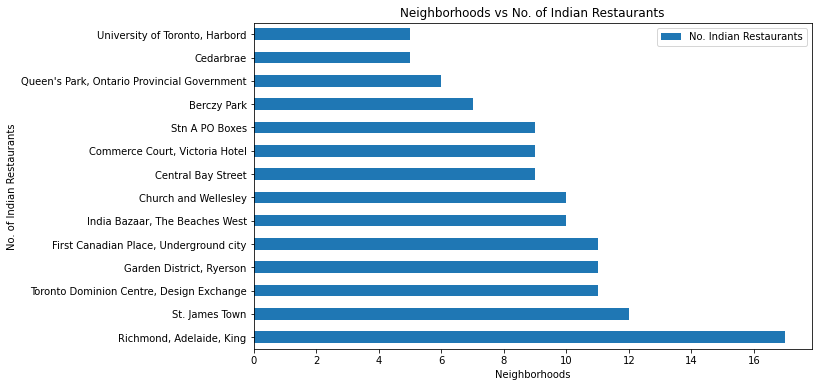

In [34]:
graph = pd.DataFrame(toronto_indian_rest.groupby('Neighborhood')['No. Indian Restaurants'].sum())
graph = graph.sort_values(by ='No. Indian Restaurants', ascending=False)
graph.iloc[:14].plot(kind='barh', figsize=(10,6))
plt.xlabel("Neighborhoods")
plt.ylabel("No. of Indian Restaurants")
plt.title("Neighborhoods vs No. of Indian Restaurants")
plt.show()

In [35]:
#Merge all the population table with the ethnic percentage by riding
etob_toro = etobicoke_york_population_df.append(toronto_eastyork_population_df,sort=True).reset_index()
etob_toro.drop('index',axis=1,inplace=True)

north_scarb = northyork_population_df.append(Scarborough_population_df,sort=True).reset_index()
north_scarb.drop('index',axis=1,inplace=True)


pop_ethnic_df = north_scarb.append(etob_toro,sort=True).reset_index()
pop_ethnic_df.drop('index',axis=1,inplace=True)


pop_ethnic_df = pop_ethnic_df[['Riding', 'Population','Ethnic Origin #1', 'Ethnic Origin 1 in %','Ethnic Origin #2', 'Ethnic Origin 2 in %',
                               'Ethnic Origin #3','Ethnic Origin 3 in %','Ethnic Origin #4', 'Ethnic Origin 4 in %','Ethnic Origin #5','Ethnic Origin 5 in %', 
                               'Ethnic Origin #6','Ethnic Origin 6 in %','Ethnic Origin #7', 'Ethnic Origin 7 in %','Ethnic Origin #8', 'Ethnic Origin 8 in %',
                               'Ethnic Origin #9','Ethnic Origin 9 in %',
                              ]]
pop_ethnic_df.head()

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,Ethnic Origin 9 in %
0,Willowdale,117405,Chinese,25.9,Iranian,12.1,Korean,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Eglinton-Lawrence,112925,Canadian,14.7,English,12.6,Polish,12.0,Filipino,11.0,Scottish,9.7,Italian,9.5,Irish,9.2,Russian,8.4,NaN,NaN
2,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,York Centre,103760,Filipino,17.0,Italian,13.4,Russian,9.5,Canadian,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the above dataframe, we can pick out the neighborhoods with highest Indian population percentage by using the below given method.

In [36]:
#Filtering the riding with Indian ethnic crowd
temp = pop_ethnic_df.loc[(pop_ethnic_df['Ethnic Origin #1'] == 'East Indian')| 
                                      (pop_ethnic_df['Ethnic Origin #2'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #3'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #4'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #5'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #6'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #7'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #8'] == 'East Indian')|
                                      (pop_ethnic_df['Ethnic Origin #9'] == 'East Indian')]
pop_indian_df = pd.DataFrame(temp).reset_index()
pop_indian_df.drop('index',axis=1,inplace=True)

pop_indian_df.head()

,Riding,Population,Ethnic Origin #1,Ethnic Origin 1 in %,Ethnic Origin #2,Ethnic Origin 2 in %,Ethnic Origin #3,Ethnic Origin 3 in %,Ethnic Origin #4,Ethnic Origin 4 in %,Ethnic Origin #5,Ethnic Origin 5 in %,Ethnic Origin #6,Ethnic Origin 6 in %,Ethnic Origin #7,Ethnic Origin 7 in %,Ethnic Origin #8,Ethnic Origin 8 in %,Ethnic Origin #9,Ethnic Origin 9 in %
0,Don Valley North,109060,Chinese,32.4,East Indian,7.3,Iranian,7.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Humber River-Black Creek,107725,Italian,12.8,East Indian,9.2,Jamaican,8.5,Vietnamese,8.0,Canadian,7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Don Valley East,93170,East Indian,10.6,Canadian,10.4,English,10.1,Chinese,8.9,Irish,8.1,Scottish,8.0,Filipino,7.8,NaN,NaN,NaN,NaN
3,Scarborough Centre,110450,Filipino,13.1,East Indian,12.2,Canadian,11.2,Chinese,10.7,English,7.8,Sri Lankan,7.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Scarborough Southwest,108295,Canadian,16.2,English,14.3,Irish,11.5,Scottish,10.9,Filipino,9.5,East Indian,8.2,Chinese,7.2,NaN,NaN,NaN,NaN


In [37]:
#retaining only Indian ethnic percentage & the neighborhood name 
columns_list = pop_indian_df.columns.to_list()
pop_indian_DF_with_percent = pd.DataFrame()
#removing Riding & Population from the column names list
del columns_list[0]
del columns_list[0]


for i in range(0,pop_indian_df.shape[0]):
    for j in columns_list:
        print(j)
        if pop_indian_df.at[i, j] == 'East Indian':
            k = columns_list.index(j) + 1
            percent_col = columns_list[k]
            pop_indian_DF_with_percent = pop_indian_DF_with_percent.append({'Riding':pop_indian_df.at[i, 'Riding'], 'Population':pop_indian_df.at[i, 'Population']
                                                                           , 'Ethnicity': pop_indian_df.at[i, j], 'Percentage': pop_indian_df.at[i, percent_col]},ignore_index=True)

pop_indian_DF_with_percent.head()  

Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #9
Ethnic Origin 9 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origin #9
Ethnic Origin 9 in %
Ethnic Origin #1
Ethnic Origin 1 in %
Ethnic Origin #2
Ethnic Origin 2 in %
Ethnic Origin #3
Ethnic Origin 3 in %
Ethnic Origin #4
Ethnic Origin 4 in %
Ethnic Origin #5
Ethnic Origin 5 in %
Ethnic Origin #6
Ethnic Origin 6 in %
Ethnic Origin #7
Ethnic Origin 7 in %
Ethnic Origin #8
Ethnic Origin 8 in %
Ethnic Origi

,Ethnicity,Percentage,Population,Riding
0,East Indian,7.3,109060.0,Don Valley North
1,East Indian,9.2,107725.0,Humber River-Black Creek
2,East Indian,10.6,93170.0,Don Valley East
3,East Indian,12.2,110450.0,Scarborough Centre
4,East Indian,8.2,108295.0,Scarborough Southwest


In [38]:
#Indian population in each Riding
pop_indian_DF_with_percent['Indian Population'] = (pop_indian_DF_with_percent['Percentage'] * pop_indian_DF_with_percent['Population'])/100
pop_indian_DF_with_percent.drop(columns={'Percentage','Population','Ethnicity'},axis=1, inplace =True)
pop_indian_DF_with_percent.drop_duplicates(keep='first',inplace=True) 
pop_indian_DF_with_percent.head()

,Riding,Indian Population
0,Don Valley North,7961.38
1,Humber River-Black Creek,9910.70
2,Don Valley East,9876.02
3,Scarborough Centre,13474.90
4,Scarborough Southwest,8880.19


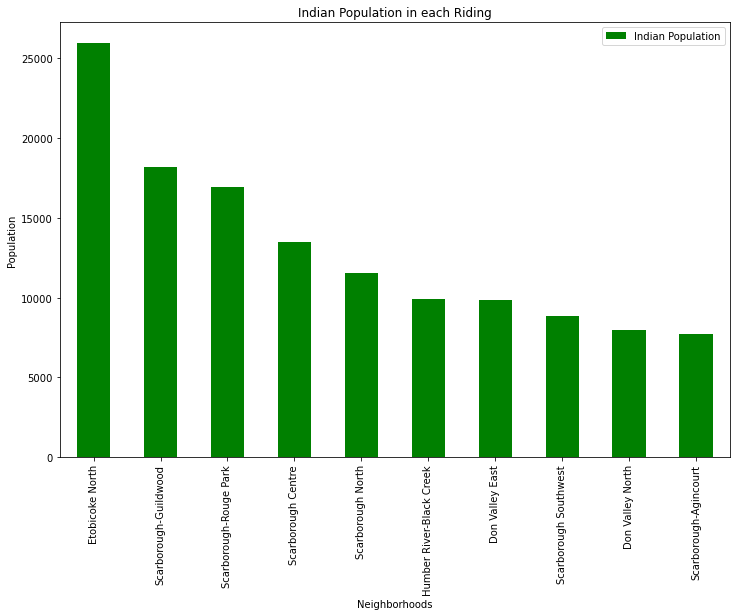

In [39]:
bar_graph = pop_indian_DF_with_percent.sort_values(by='Indian Population', ascending=False)
bar_graph.plot(kind='bar',x='Riding', y='Indian Population',figsize=(12,8), color='green')
plt.title("Indian Population in each Riding")
plt.xlabel("Neighborhoods")
plt.ylabel("Population")
plt.show()

This graph shows relationship between neighborhoods & Indian population. This helps us to identify highly populated Indian neighborhoods. Once we identify those neighborhoods it helps us in deciding where to place the new  Indian restaurant. An Indian restaurant placed in an densely populated Indian neighborhood is more likely to get more Indian customers than a restaurant placed in a neighborhood with less or no Indian population. Thus this analysis helps in the determining the success of the new Indian restaurant.

## Identify Relationship between Indian Population and Indian Restaurants
- First get the list of neighborhoods present in the riding using the Wikipedia Geography Section for each riding. 
- Altering the riding names to match the Wikipedia page so we can retrieve the neighborhoods present in those ridings.

In [40]:
#Altering the list to match the wikipedia page so we can retrieve the neighborhoods present in those Ridings
riding_list = pop_indian_DF_with_percent['Riding'].to_list()
#print(riding_list)
riding_list[riding_list.index('Scarborough Centre')] = 'Scarborough Centre (electoral district)'
riding_list[riding_list.index('Scarborough North')] = 'Scarborough North (electoral district)'
riding_list

['Don Valley North',
 'Humber River-Black Creek',
 'Don Valley East',
 'Scarborough Centre (electoral district)',
 'Scarborough Southwest',
 'Scarborough-Agincourt',
 'Scarborough-Rouge Park',
 'Scarborough-Guildwood',
 'Scarborough North (electoral district)',
 'Etobicoke North']

In [41]:
pip install wikipedia

In [42]:
#Scraping wiki page to get the neighborhoods of each Ridings
import wikipedia

Riding_neighborhood_df = pd.DataFrame()

for item in riding_list:
    section = wikipedia.WikipediaPage(item).section('Geography')
    start = section.index('neighbourhoods of') + 17
    stop = section.index('.',start)
    Riding_neighborhood_df = Riding_neighborhood_df.append({'Riding':item, 'Neighborhoods':section[start:stop]},ignore_index=True)
    

Riding_neighborhood_df = Riding_neighborhood_df[['Riding','Neighborhoods']]
Riding_neighborhood_df
    

,Riding,Neighborhoods
0,Don Valley North,"Henry Farm, Bayview Village, Bayview Woods-St..."
1,Humber River-Black Creek,"Humber Summit, Humbermede, Humberlea, York Un..."
2,Don Valley East,"Flemingdon Park, Don Mills, Graydon Hall, Par..."
3,Scarborough Centre (electoral district),Scarborough City Centre (west of McCowan Road...
4,Scarborough Southwest,"Birch Cliff, Oakridge, Cliffside, Kennedy Par..."
5,Scarborough-Agincourt,"Steeles, L'Amoreaux, Tam O'Shanter-Sullivan, ..."
6,Scarborough-Rouge Park,"Morningside Heights, Rouge, Port Union, West ..."
7,Scarborough-Guildwood,"Guildwood, West Hill (west of Morningside Ave..."
8,Scarborough North (electoral district),"Agincourt (east of Midland Avenue), Milliken ..."
9,Etobicoke North,"The Elms, Humberwood, Kingsview Village, This..."


In [43]:
#Merging the pop_indian_DF_with_percent dataframe containing population information with the Riding_neighborhood_df dataframe.

Neigh_pop = pd.merge(pop_indian_DF_with_percent, Riding_neighborhood_df, on='Riding')

Neigh_pop

,Riding,Indian Population,Neighborhoods
0,Don Valley North,7961.380,"Henry Farm, Bayview Village, Bayview Woods-St..."
1,Humber River-Black Creek,9910.700,"Humber Summit, Humbermede, Humberlea, York Un..."
2,Don Valley East,9876.020,"Flemingdon Park, Don Mills, Graydon Hall, Par..."
3,Scarborough Southwest,8880.190,"Birch Cliff, Oakridge, Cliffside, Kennedy Par..."
4,Scarborough-Agincourt,7712.650,"Steeles, L'Amoreaux, Tam O'Shanter-Sullivan, ..."
5,Scarborough-Rouge Park,16941.315,"Morningside Heights, Rouge, Port Union, West ..."
6,Scarborough-Guildwood,18200.700,"Guildwood, West Hill (west of Morningside Ave..."
7,Etobicoke North,25965.120,"The Elms, Humberwood, Kingsview Village, This..."


In [ ]:
Neigh_pop['split_neighborhoods'] = Neigh_pop['Neighborhoods'].str.split(',') 
#print(Neigh_pop['split_neighborhoods'])

Neigh_pop.drop(columns=['Neighborhoods'],inplace=True,axis=1)
Neigh_pop
Neigh_pop = Neigh_pop.split_neighborhoods.apply(pd.Series).merge(Neigh_pop, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['Indian Population'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

Neigh_pop.reset_index()

In [92]:
Neigh_pop.sort_values(by='Indian Population', ascending=False)

,Cluster Labels,Indian Population
Neighborhood,,
Etobicoke North,1,25965.120
The Elms,1,25965.120
Thistletown,1,25965.120
Kingsview Village,1,25965.120
Humberwood,1,25965.120
and Willowridge,1,25965.120
Guildwood,5,18200.700
West Hill (west of Morningside Avenue),5,18200.700
and Scarborough Village (east of Markham Road),5,18200.700


As you can see from the dataframe above, the population assigned to each neighborhood is the same as the toal for the riding as we don't have the population percentage for each neighborhood. 

In [45]:
toronto_indian_rest.head()


,Neighborhood,No. Indian Restaurants
0,Agincourt,1
1,"Alderwood, Long Branch",1
2,"Bedford Park, Lawrence Manor East",4
3,Berczy Park,7
4,"Birch Cliff, Cliffside West",1


In [46]:

toronto_indian_rest['split_neighborhoods'] = toronto_indian_rest['Neighborhood'].str.split(',') 
toronto_indian_rest.drop(columns=['Neighborhood'],inplace=True,axis=1)


<ipython-input-46-f71180b0a3f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  toronto_indian_rest['split_neighborhoods'] = toronto_indian_rest['Neighborhood'].str.split(',')
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
toronto_indian_rest = toronto_indian_rest.split_neighborhoods.apply(pd.Series).merge(toronto_indian_rest, left_index = True, right_index = True).drop(["split_neighborhoods"], axis = 1)\
                    .melt(id_vars = ['No. Indian Restaurants'], value_name = "Neighborhood").drop("variable", axis = 1).dropna()

toronto_indian_rest.reset_index()
toronto_indian_rest.head()

,No. Indian Restaurants,Neighborhood
0,1,Agincourt
1,1,Alderwood
2,4,Bedford Park
3,7,Berczy Park
4,1,Birch Cliff


In [48]:
toronto_indian_rest.sort_values(by='No. Indian Restaurants', ascending=False)

,No. Indian Restaurants,Neighborhood
38,17,Richmond
156,17,King
97,17,Adelaide
42,12,St. James Town
22,11,Garden District
...,...,...
83,1,Clairlea
84,1,Morningside
92,1,Trinity
93,1,Rouge


In [52]:
pop_merged_restaurant_percent = pd.merge(Neigh_pop, toronto_indian_rest, on='Neighborhood')
pop_merged_restaurant_percent

,Indian Population,Neighborhood,No. Indian Restaurants
0,7961.380,Henry Farm,3
1,8880.190,Oakridge,1
2,16941.315,Rouge,1
3,18200.700,Morningside,1
4,25965.120,Thistletown,3
5,8880.190,Clairlea,1


In [53]:
pop_merged_restaurant_percent.sort_values(by='Indian Population', ascending=False)

,Indian Population,Neighborhood,No. Indian Restaurants
4,25965.120,Thistletown,3
3,18200.700,Morningside,1
2,16941.315,Rouge,1
1,8880.190,Oakridge,1
5,8880.190,Clairlea,1
0,7961.380,Henry Farm,3


After performing the data cleaning & data analysis we can identify that their no big relationship established in terms of the Indian population & the popular Indian restaurants.

Thus this marks end of the data cleaning & analyses step in this project. Next we will look into the predictive modeling. In the predictive modelling we are going to use clustering techniques since this is analysis of unlabelled data. K-Means clustering is used to perform the analysis of the data at hand.

# Predictive Modelling
- Use the K-means machine learning model to group the neighborhoods into cluster based on the density of Indian restaurants in each neighborhood.
- First step in K-means clustering is to identify best K value meaning the number of clusters in a given dataset. To do so I'm going to use the elbow method on the Toronto dataset with Indian restaurant percentage

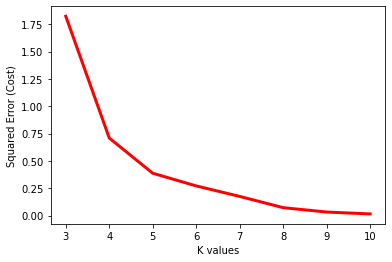

In [54]:
from sklearn.cluster import KMeans

toronto_indian_rest_clustering = toronto_indian_rest.drop('Neighborhood', 1)


error_cost = []

for i in range(3,11):
    KM = KMeans(n_clusters = i, max_iter = 100)
    try:
        KM.fit(toronto_indian_rest_clustering)
    except ValueError:
        print("error on line",i)
    
    
    
    
    #calculate squared error for the clustered points
    error_cost.append(KM.inertia_/100)

#plot the K values aganist the squared error cost
plt.plot(range(3,11), error_cost, color='r', linewidth='3')
plt.xlabel('K values')
plt.ylabel('Squared Error (Cost)')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.show()

In [58]:
conda install -c districtdatalabs yellowbrick

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [59]:
from yellowbrick.cluster import KElbowVisualizer

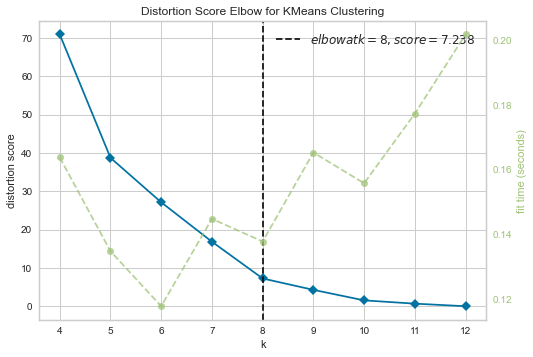

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [60]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,13))

visualizer.fit(toronto_indian_rest_clustering)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

After analysing using elbow method using distortion score & Squared error for each K value, looks like K = 8 is the best value. \
Clustering the Toronto Neighborhood Using K-Means with K = 8

In [61]:
kclusters = 8

toronto_indian_rest_clustering = toronto_indian_rest.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_indian_rest_clustering)

kmeans.labels_

array([2, 2, 0, 7, 2, 5, 5, 2, 5, 7, 4, 5, 4, 6, 4, 5, 2, 5, 6, 5, 6, 1,
       1, 2, 2, 2, 0, 0, 0, 4, 6, 7, 5, 2, 2, 2, 7, 0, 3, 0, 2, 6, 1, 6,
       7, 4, 7, 0, 5, 2, 5, 0, 1, 7, 0, 2, 2, 2, 2, 2, 0, 2, 5, 5, 6, 4,
       6, 5, 6, 1, 1, 2, 2, 0, 0, 4, 6, 7, 2, 2, 2, 7, 0, 3, 0, 2, 6, 6,
       7, 0, 5, 5, 1, 7, 0, 2, 2, 5, 6, 6, 6, 2, 2, 0, 6, 7, 3, 6, 0, 5,
       6, 0, 6, 0, 6, 6, 6])

In [62]:
toronto_indian_rest.insert(0, 'Cluster Labels', kmeans.labels_)

In [90]:
toronto_indian_rest

,Cluster Labels,No. Indian Restaurants,Neighborhood
0,2,1,Agincourt
1,2,1,Alderwood
2,0,4,Bedford Park
3,7,7,Berczy Park
4,2,1,Birch Cliff
...,...,...,...
277,6,3,Mount Olive
283,0,4,Deer Park
336,6,3,Beaumond Heights
395,6,3,Thistletown


In [89]:
toronto_merged_new = toronto_df
toronto_merged_new

,Borough,PostalCode,Neighborhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160
...,...,...,...,...,...
98,York,M6C,Humewood-Cedarvale,43.693781,-79.428191
99,York,M6E,Caledonia-Fairbanks,43.689026,-79.453512
100,York,M6M,"Del Ray, Mount Dennis, Keelsdale and Silverthorn",43.691116,-79.476013
101,York,M6N,"Runnymede, The Junction North",43.673185,-79.487262


In [65]:
# merge toronto_data to add latitude/longitude for each neighborhood
toronto_merged_new = toronto_merged_new.join(toronto_indian_rest.set_index('Neighborhood'), on='Neighborhood')
toronto_merged_new.dropna(subset=["Cluster Labels"], axis=0, inplace=True)
toronto_merged_new.reset_index(drop=True, inplace=True)
toronto_merged_new['Cluster Labels'].astype(int)
toronto_merged_new.head()

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,No. Indian Restaurants
0,Central Toronto,M4P,Davisville North,43.712751,-79.390197,2.0,1.0
1,Central Toronto,M4S,Davisville,43.704324,-79.388790,5.0,2.0
2,Downtown Toronto,M4Y,Church and Wellesley,43.665860,-79.383160,4.0,10.0
3,Downtown Toronto,M5C,St. James Town,43.651494,-79.375418,1.0,12.0
4,Downtown Toronto,M5C,St. James Town,43.651494,-79.375418,6.0,3.0


In [66]:
toronto_merged_with_cluster_labels = toronto_merged_new
toronto_merged_with_cluster_labels

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,No. Indian Restaurants
0,Central Toronto,M4P,Davisville North,43.712751,-79.390197,2.0,1.0
1,Central Toronto,M4S,Davisville,43.704324,-79.388790,5.0,2.0
2,Downtown Toronto,M4Y,Church and Wellesley,43.665860,-79.383160,4.0,10.0
3,Downtown Toronto,M5C,St. James Town,43.651494,-79.375418,1.0,12.0
4,Downtown Toronto,M5C,St. James Town,43.651494,-79.375418,6.0,3.0
5,Downtown Toronto,M5E,Berczy Park,43.644771,-79.373306,7.0,7.0
6,Downtown Toronto,M5G,Central Bay Street,43.657952,-79.387383,4.0,9.0
7,Downtown Toronto,M5W,Stn A PO Boxes,43.646435,-79.374846,4.0,9.0
8,Downtown Toronto,M6G,Christie,43.669542,-79.422564,5.0,2.0
9,East Toronto,M4E,The Beaches,43.676357,-79.293031,2.0,1.0


## Visualization of Restaurant Clusters in Neighborhoods
- Using Folium map we visualize six restaurant clusters

In [67]:
import matplotlib.cm as cm
import matplotlib.colors as colors

clusters_map = folium.Map(
    location=[latitude, longitude], 
    zoom_start=11,
    width='90%',
    height='70%')

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged_with_cluster_labels['Latitude'],
                                  toronto_merged_with_cluster_labels['Longitude'],
                                  toronto_merged_with_cluster_labels['Neighborhood'],
                                  toronto_merged_with_cluster_labels['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(clusters_map)
clusters_map

## Examining the Clusters
- We have total of 8 clusters such as 0,1,2,3,4,5,6,7. Let us examine one after the other.

**Cluster 3 has no rows, meaning no data points or neighborhoods were near to this centroid.**

In [72]:
#Cluster 3
cluster_3 = toronto_merged_with_cluster_labels.loc[toronto_merged_with_cluster_labels['Cluster Labels'] == 3]
cluster_3

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,No. Indian Restaurants


**Cluster 1 and 4 contain the neighborhoods which are the most densely populated by Indian restaurants, and we can see all of these are in Downtown Toronto. Cluster 1 is pale orange and Cluster 4 is turquoise color on the map.**

In [69]:
#Cluster 1
cluster_1 = toronto_merged_with_cluster_labels.loc[toronto_merged_with_cluster_labels['Cluster Labels'] == 1]
cluster_1

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,No. Indian Restaurants
3,Downtown Toronto,M5C,St. James Town,43.651494,-79.375418,1.0,12.0


In [73]:
#Cluster 4
cluster_4 = toronto_merged_with_cluster_labels.loc[toronto_merged_with_cluster_labels['Cluster Labels'] == 4]
cluster_4

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,No. Indian Restaurants
2,Downtown Toronto,M4Y,Church and Wellesley,43.665860,-79.383160,4.0,10.0
6,Downtown Toronto,M5G,Central Bay Street,43.657952,-79.387383,4.0,9.0
7,Downtown Toronto,M5W,Stn A PO Boxes,43.646435,-79.374846,4.0,9.0


**Neighborhoods in Cluster 7 are medium- to highly-populated by Indian restaurants. This cluster is orange on the map.**

In [88]:
#Cluster 7
cluster_7 = toronto_merged_with_cluster_labels.loc[toronto_merged_with_cluster_labels['Cluster Labels'] == 7]
cluster_7

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,No. Indian Restaurants
5,Downtown Toronto,M5E,Berczy Park,43.644771,-79.373306,7.0,7.0
10,East Toronto,M4M,Studio District,43.659526,-79.340923,7.0,5.0
19,Scarborough,M1H,Cedarbrae,43.773136,-79.239476,7.0,5.0


**Neighborhoods in Cluster 0 are medium-populated by Indian restaurants. Cluster 0 is red on the map.**

In [68]:
#Cluster 0
cluster_0 = toronto_merged_with_cluster_labels.loc[toronto_merged_with_cluster_labels['Cluster Labels'] == 0]
cluster_0

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,No. Indian Restaurants
13,East York,M4H,Thorncliffe Park,43.705369,-79.349372,0.0,4.0
21,York,M6C,Humewood-Cedarvale,43.693781,-79.428191,0.0,4.0


**We can see St. James Town is the only  neighborhood in Cluster 6, however this neighborhood is also listed in Cluster 1 as having 12 Indian restaurants in the vicinity so we can disregard this cluster.**

In [87]:
#Cluster 6
cluster_6 = toronto_merged_with_cluster_labels.loc[toronto_merged_with_cluster_labels['Cluster Labels'] == 6]
cluster_6

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,No. Indian Restaurants
4,Downtown Toronto,M5C,St. James Town,43.651494,-79.375418,6.0,3.0


**Cluster 5 contains neighborhoods which are sparsely populated with Indian restaurants. It is shown in lime green color on the map.**

In [74]:
#Cluster 5
cluster_5 = toronto_merged_with_cluster_labels.loc[toronto_merged_with_cluster_labels['Cluster Labels'] == 5]
cluster_5

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,No. Indian Restaurants
1,Central Toronto,M4S,Davisville,43.704324,-79.388790,5.0,2.0
8,Downtown Toronto,M6G,Christie,43.669542,-79.422564,5.0,2.0
12,East York,M4G,Leaside,43.709060,-79.363452,5.0,2.0
14,Mississauga,M7R,Canada Post Gateway Processing Centre,43.636966,-79.615819,5.0,2.0
15,North York,M3B,Don Mills,43.745906,-79.352188,5.0,2.0
16,North York,M3C,Don Mills,43.725900,-79.340923,5.0,2.0


**Cluster 2 contains the neighborhoods with the least amount of Indian restaurants in the vicinity. It is shown in blue color on the map.** This cluster shows neighborhoods which may be suitable for opening a new Indian restaurant as there is low competition here.**

In [71]:
#Cluster 2
cluster_2 = toronto_merged_with_cluster_labels.loc[toronto_merged_with_cluster_labels['Cluster Labels'] == 2]
cluster_2

,Borough,PostalCode,Neighborhood,Latitude,Longitude,Cluster Labels,No. Indian Restaurants
0,Central Toronto,M4P,Davisville North,43.712751,-79.390197,2.0,1.0
9,East Toronto,M4E,The Beaches,43.676357,-79.293031,2.0,1.0
11,East York,M4C,Woodbine Heights,43.695344,-79.318389,2.0,1.0
17,North York,M6B,Glencairn,43.709577,-79.445073,2.0,1.0
18,Scarborough,M1G,Woburn,43.770992,-79.216917,2.0,1.0
20,Scarborough,M1S,Agincourt,43.794200,-79.262029,2.0,1.0
22,York,M6E,Caledonia-Fairbanks,43.689026,-79.453512,2.0,1.0


## 4. Results

We have come to the end of our analysis, and in this section, I will discuss my findings. To begin this project, I introduced the business problem of identifying a suitable neighbourhood to open a new Indian restaurant in Toronto. To achieve this, I investigated all the neighbourhoods in Toronto, analysed the Indian population in each riding and the number of Indian restaurants in each neighbourhood to come to conclusion about which neighbourhood would be an ideal location. I used variety of data sources to set up a very realistic data-analysis scenario. 

My findings: 
- Of all the ridings, Etobicoke North, Scarborough-Guildwood, Scarborough-Rouge Park, Scarborough Centre, Scarborough North are the most densely populated by the East Indian ethnic group.
- By examining the clusters and bar chart, it looks like Downtown Toronto, Central Toronto, East York are already densely populated with Indian restaurants, so I believe it is better idea to avoid opening another restaurant in these areas and consider only Scarborough, Etobicoke & North York for the new restaurant’s location. 
- After careful consideration, I think it is a good idea to open a new Indian restaurant in Etobicoke North as it is the riding with the largest Indian population, but there are only 3 Indian restaurants in one of the 6 neighborhoods in Etobicoke North, so there doesn’t seem be too much competition there.
- The Scarborough area would also be an excellent option since it too has a high Indian population so there are more possible interested customers than other areas, and there would be low competition since there is not a high number of Indian restaurants in these neighbourhoods. 



## 5. Discussion

According to this analysis, Etobicoke North or Scarborough seem to be very suitable locations to open a new Indian restaurant, as they both have high numbers of Indians living there, which means there could be a strong customer base. And they also have low numbers of existing Indian restaurants so there should not be a great deal of competition in these areas.  

While my analysis showed these areas as possibly the most suitable locations for a new restaurant in Toronto, there were also some limitations to my analysis, for example: 
- The data I used for the Indian population distribution is from 2016, and as I mentioned that number of Indians being admitted into Canada as permanent residents has doubled in the past few years, so we cannot assume that the distribution remains the same today, and it’s very possible that some areas have become more popular since 2016. 
- The clustering is based only on data obtained from Foursquare API. And my search results really depended on the radius I chose. In some neighborhoods, it would have been better to have a radius larger that 750m, but when I applied a 1 km radius to my request, this resulted into many restaurants overlapping into multiple neighborhoods. 
- There are many other factors that are important to consider when deciding where to open a new restaurant such as the cost of rent and the amount of foot traffic in this areas, however analysing these features are beyond the scope of this capstone project.
- As a beginner to data science, I’m still very new to data visualisation and analysis, and if I had greater skills in these areas, I would have liked to try to visualize the Indian population on a geographical heatmap to better show the spread of the Indian population over Toronto. I would also liked to have tried other forms of machine learning for my analysis, but K-means was the main type of machine learning that was introduced in this course.

Although there are lots of areas where it can be improved, I think overall this analysis has still provided us with some good insights into potential locations which could be ideal for opening a new Indian restaurant.  


## 6. Conclusion: 

In this capstone project, we were given the opportunity to work on a typical business problem that a data scientist might try to solve. I was able to utilize most of the key learning outcomes from the past eight courses, including using Python libraries to fetch data, and to manipulate, analyse and visualize these dataframes. I have used Foursquare API to search for Indian restaurants in neighborhoods in Toronto, and I have gotten data from Wikipedia by scraping pages with help from the Wikipedia python library. I also applied the K-means machine learning technique to predict the output given the data and used Folium to visualize it on a map. Some areas of improvements for future analysis include using more data from more diverse sources and utilizing different machine learning techniques. 

Finally, while this project investigated the most ideal location to open a new Indian restaurant in Toronto, this type of analysis could also be applied to other kinds of business ventures, like where to open a Asian supermarket, and to other cities around the world. 

